In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import statsmodels.api as sm
import numpy as np
from sklearn.tree import DecisionTreeRegressor, export_graphviz
import graphviz
from sklearn.linear_model import Lasso, LinearRegression

In [2]:
df = pd.read_csv('datasets/edited/df_numeric.csv')

### Описательные статистики всей базы данных

In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,50069.0,2.395708e+07,4.135874e+07,1.021305e+06,8.450000e+06,1.230000e+07,2.200000e+07,9.899415e+08
room_num,50069.0,2.414668e+00,1.101872e+00,1.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
appartments,50069.0,3.347381e-02,1.798721e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
total_sq,50069.0,7.818709e+01,5.560163e+01,1.180000e+01,4.547000e+01,6.360000e+01,8.861000e+01,1.380000e+03
red_line,50069.0,8.805848e-02,2.833828e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
light_blue_line,50069.0,5.636222e-02,2.306222e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
purple_line,50069.0,9.968244e-02,2.995791e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
green_line,50069.0,1.061335e-01,3.080115e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
yellow_line,50069.0,2.550480e-02,1.576541e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
light_green_line,50069.0,7.503645e-02,2.634528e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00


In [4]:
df.corr()

,price,room_num,appartments,total_sq,red_line,light_blue_line,purple_line,green_line,yellow_line,light_green_line,...,UVAO,SZAO,SVAO,VAO,UAO,UZAO,ZAO,ZalAO,CAO,TAO
price,1.000000,0.502324,0.052390,0.766536,0.193311,0.159153,0.044983,0.065516,0.026202,-0.016313,...,-0.110247,-0.011963,-0.076792,-0.075702,-0.080169,-0.040874,0.063336,-0.042666,0.398042,-0.044921
room_num,0.502324,1.000000,-0.040811,0.746465,0.125928,0.111672,0.036267,0.026332,0.000284,-0.002470,...,-0.085365,0.026553,-0.055867,-0.058561,-0.065095,0.011540,0.091520,-0.019887,0.219337,-0.043657
appartments,0.052390,-0.040811,1.000000,0.021584,0.027591,0.043591,0.015172,0.134511,0.044551,-0.010015,...,-0.051056,-0.018704,0.008190,-0.033109,-0.035409,-0.039247,-0.033784,-0.017533,0.139116,0.003158
total_sq,0.766536,0.746465,0.021584,1.000000,0.138700,0.122193,0.043153,0.031816,0.002493,-0.030596,...,-0.108108,0.036077,-0.079252,-0.082405,-0.086613,-0.008386,0.124129,-0.036063,0.258498,-0.035122
red_line,0.193311,0.125928,0.027591,0.138700,1.000000,0.015127,-0.078460,-0.093347,-0.048930,-0.049983,...,-0.103297,-0.088787,-0.091342,0.047626,-0.100333,0.000822,0.114577,-0.034366,0.291784,-0.031585
light_blue_line,0.159153,0.111672,0.043591,0.122193,0.015127,1.000000,-0.016566,-0.079996,-0.039538,-0.069609,...,-0.081322,-0.059666,-0.072043,-0.068248,-0.079288,-0.081628,0.325326,-0.027029,0.170197,-0.024841
purple_line,0.044983,0.036267,0.015172,0.043153,-0.078460,-0.016566,1.000000,0.079284,0.060348,0.070223,...,0.144309,0.233783,-0.098088,-0.051485,-0.097503,-0.111138,-0.137689,-0.036800,0.162861,-0.033822
green_line,0.065516,0.026332,0.134511,0.031816,-0.093347,-0.079996,0.079284,1.000000,0.043791,0.043136,...,-0.078804,-0.085444,-0.100142,-0.095974,0.163905,-0.115091,-0.142782,-0.038109,0.109988,-0.035025
yellow_line,0.026202,0.000284,0.044551,0.002493,-0.048930,-0.039538,0.060348,0.043791,1.000000,0.068851,...,0.050977,-0.046224,-0.047690,0.175870,-0.052485,-0.053191,-0.067035,-0.017892,0.149948,-0.016444
light_green_line,-0.016313,-0.002470,-0.010015,-0.030596,-0.049983,-0.069609,0.070223,0.043136,0.068851,1.000000,...,0.215524,-0.081380,0.060553,-0.079537,0.035442,-0.095131,-0.118020,-0.031500,0.114218,-0.028951


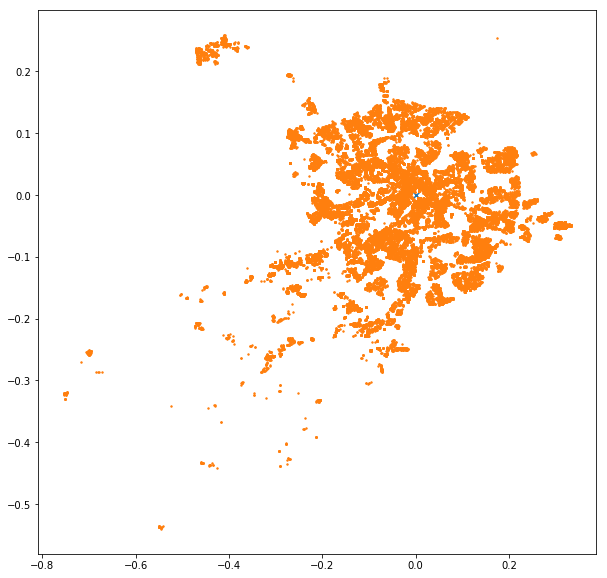

In [5]:
plt.figure(figsize=(10,10))
plt.scatter(0, 0, marker='x')
plt.scatter(df['lon'], df['lat'], s=2);

In [6]:
X = df.drop('price', axis=1)
Y = np.log(df['price'])

## Просто линейная регрессия

In [7]:
#stats models
X = sm.add_constant(X)
lr = sm.OLS(Y, X).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     8453.
Date:                Tue, 24 Sep 2019   Prob (F-statistic):               0.00
Time:                        09:48:49   Log-Likelihood:                -9816.7
No. Observations:               50069   AIC:                         1.971e+04
Df Residuals:                   50029   BIC:                         2.007e+04
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     7.34

### Видим, что все признаки районов оказываются не значимыми

## Попробуем лассо регрессию

In [8]:
X.drop('const',axis=1, inplace=True)

In [13]:
lr = Lasso(alpha=0.001)
lr.fit(X,Y)
lr.score(X,Y)

0.8666331029501443

In [18]:
print('const : ', lr.intercept_)
for coef, value in list(zip(X.columns,lr.coef_)):
    print(coef, ': ', value)

const :  7.214871033410438
room_num :  0.18062878361865523
appartments :  -0.09783488787389352
total_sq :  0.004416916430095039
red_line :  0.15699755488953956
light_blue_line :  0.09920096167746663
purple_line :  0.004312162266042874
green_line :  0.07381391829858142
yellow_line :  -0.0002891827390370269
light_green_line :  -0.01893520899003011
dark_blue_line :  0.0550178969393959
orange_line :  0.07256254026675749
grey_line :  0.02459139260468401
mcc :  -0.06302070751402963
light_grey_line :  0.01782258124552188
light_purple_line :  0.048456790791984575
light_yellow_line :  0.0
sea_colour_line :  -0.0
year :  0.004342439997595922
floor :  0.0042659742684353725
max_floor :  0.0007817570649571906
living_space :  0.0014114573890492603
kitchen_space :  0.012973043118170893
lat :  -0.0
lon :  -0.20061505405774002
distance_from_kremlin :  -0.0441213947720534
subway_min :  0.00149548954032654
min_dist_to_sub :  0.025438756585024553
NAO :  -0.016836235174203892
SAO :  -0.0
UVAO :  -0.1347358

## Выводы/вопросы по регерссиям на всей Москве
### 1)Странно, что обе регрессии показывают, что расстояние до метро и минимальное расстояние, как положительные признаки
### 2) Все районы в обычной регрссии - незначимые признаки. В лассо регрессии районы запада положительные и ЦАО - положительные, что адекватно вроде бы, однако почему-то положительнй зеленоград, что странно

# Регрессия по районам

## NAO

In [68]:
areas = ['NAO', 'SAO', 'UVAO', 'SZAO', 'SVAO', 'VAO', 'UAO','UZAO', 'ZAO', 'ZalAO', 'CAO', 'TAO']
lasso_coefs = []

Area: NAO
Количество записей:  3369


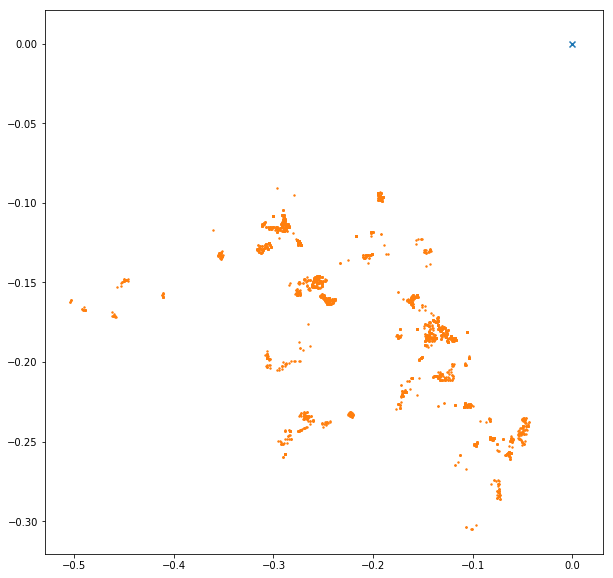

In [69]:
area = areas[0]
print('Area:',area)
X = df[df[areas[0]] == 1].drop('price',axis=1)
X.drop(areas,axis=1,inplace=True)
Y = np.log(df[df[areas[0]] == 1]['price'])
print('Количество записей: ', X.shape[0])
plt.figure(figsize=(10,10))
plt.scatter(0, 0, marker='x')
plt.scatter(X['lon'], X['lat'], s=2);

In [70]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
room_num,3369.0,1.964084,0.872967,1.000000,1.000000,2.000000,3.000000,6.000000
appartments,3369.0,0.006233,0.078717,0.000000,0.000000,0.000000,0.000000,1.000000
total_sq,3369.0,60.848664,23.862119,19.800000,41.400000,58.400000,74.600000,327.000000
red_line,3369.0,0.072128,0.258739,0.000000,0.000000,0.000000,0.000000,1.000000
light_blue_line,3369.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
purple_line,3369.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
green_line,3369.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
yellow_line,3369.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
light_green_line,3369.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
dark_blue_line,3369.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [71]:
X = sm.add_constant(X)
lr = sm.OLS(Y, X).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     582.1
Date:                Tue, 24 Sep 2019   Prob (F-statistic):               0.00
Time:                        10:50:55   Log-Likelihood:                 1205.1
No. Observations:                3369   AIC:                            -2374.
Df Residuals:                    3351   BIC:                            -2264.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    19.44

/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:1100: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [72]:
lr = Lasso(alpha=0.001)
X.drop('const',axis=1,inplace=True)
lr.fit(X,Y)
print('R2 Lasso:', lr.score(X,Y))
print('const : ', lr.intercept_)
for coef, value in list(zip(X.columns,lr.coef_)):
    print(coef, ': ', value)
lasso_coefs.append({area: lr.coef_})

R2 Lasso: 0.7423515963963667
const :  18.34558819140537
room_num :  0.06900546531219792
appartments :  -0.08462498062645224
total_sq :  0.0078332269069014
red_line :  0.0
light_blue_line :  0.0
purple_line :  0.0
green_line :  0.0
yellow_line :  0.0
light_green_line :  0.0
dark_blue_line :  0.0
orange_line :  0.0
grey_line :  0.0
mcc :  0.0
light_grey_line :  -0.0
light_purple_line :  0.0
light_yellow_line :  0.1639502375312496
sea_colour_line :  0.0
year :  -0.0014966391509692303
floor :  0.006289412465794006
max_floor :  0.0024524635203602516
living_space :  0.00038111503793103945
kitchen_space :  0.006331643540719749
lat :  0.0
lon :  -0.0
distance_from_kremlin :  -0.000489914592594794
subway_min :  -0.010593429243355155
min_dist_to_sub :  -0.02544894316277115


## Выводы/вопросы 
### 1) Странно, что в обычной регрессии долгота и широта - значимые признаки с большими коэф
### 2) Странно, что в обычной регрессии минимальное расстояние до центра ветки ( в станциях) имеет положительный коэф, а в лассо отрицательный 

# SAO

Area: SAO
Количество записей:  5322


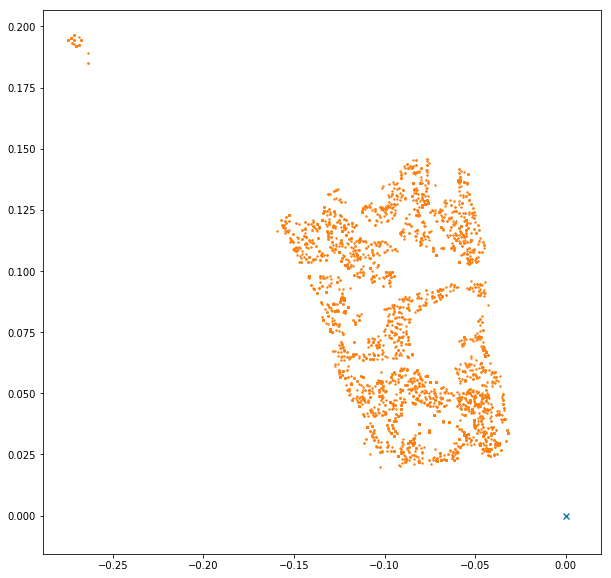

In [73]:
area = areas[1]
print('Area:',area)
X = df[df[areas[1]] == 1].drop('price',axis=1)
X.drop(areas,axis=1,inplace=True)
Y = np.log(df[df[areas[1]] == 1]['price'])
print('Количество записей: ', X.shape[0])
plt.figure(figsize=(10,10))
plt.scatter(0, 0, marker='x')
plt.scatter(X['lon'], X['lat'], s=2);

In [74]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
room_num,5322.0,2.327884,1.030528,1.000000,2.000000,2.000000,3.000000,6.000000
appartments,5322.0,0.076099,0.265182,0.000000,0.000000,0.000000,0.000000,1.000000
total_sq,5322.0,73.101631,45.543770,17.400000,45.000000,62.000000,85.000000,667.000000
red_line,5322.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
light_blue_line,5322.0,0.000188,0.013708,0.000000,0.000000,0.000000,0.000000,1.000000
purple_line,5322.0,0.155769,0.362670,0.000000,0.000000,0.000000,0.000000,1.000000
green_line,5322.0,0.478955,0.499604,0.000000,0.000000,0.000000,1.000000,1.000000
yellow_line,5322.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
light_green_line,5322.0,0.093574,0.291262,0.000000,0.000000,0.000000,0.000000,1.000000
dark_blue_line,5322.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [75]:
X = sm.add_constant(X)
lr = sm.OLS(Y, X).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     1945.
Date:                Tue, 24 Sep 2019   Prob (F-statistic):               0.00
Time:                        10:50:58   Log-Likelihood:                 500.60
No. Observations:                5322   AIC:                            -957.2
Df Residuals:                    5300   BIC:                            -812.5
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     9.39

In [76]:
lr = Lasso(alpha=0.001)
X.drop('const',axis=1,inplace=True)
lr.fit(X,Y)
print('R2 Lasso:', lr.score(X,Y))
print('const : ', lr.intercept_)
for coef, value in list(zip(X.columns,lr.coef_)):
    print(coef, ': ', value)
lasso_coefs.append({area: lr.coef_})

R2 Lasso: 0.8769451080936933
const :  10.60918318771725
room_num :  0.12469844283611098
appartments :  -0.035619163661629684
total_sq :  0.007277402349669141
red_line :  0.0
light_blue_line :  0.0
purple_line :  -0.009441370011627818
green_line :  0.08651353052785159
yellow_line :  0.0
light_green_line :  -0.04045561487809281
dark_blue_line :  0.0
orange_line :  0.0
grey_line :  -0.051287649764714
mcc :  -0.0
light_grey_line :  0.0
light_purple_line :  0.0
light_yellow_line :  0.0
sea_colour_line :  0.0
year :  0.0026695118094096637
floor :  0.003221285840330233
max_floor :  0.00483194007306143
living_space :  6.003812261306681e-06
kitchen_space :  0.009837800529568166
lat :  -0.0
lon :  -0.0
distance_from_kremlin :  -0.043197395967569094
subway_min :  -0.012378266342613648
min_dist_to_sub :  0.016431773514274054


## Выводы
### 1) коэф перед последними признаками регрессий опять разнятся
### 2) может, стоит убрать объявления, адреса которых за химками (см. карту - меньший кластер)
### 3) опять долгота и широта оч имеют очень большие коэф в обычной регрессии

## UVAO

Area: UVAO
Количество записей:  5023


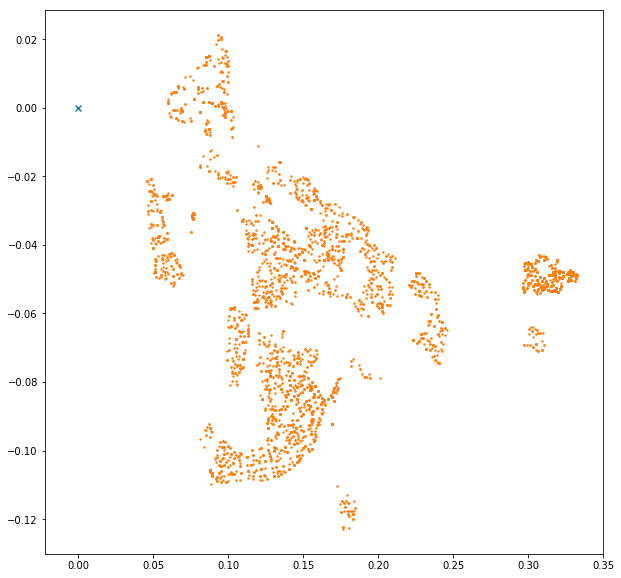

In [78]:
area = areas[2]
print('Area:',area)
X = df[df[areas[2]] == 1].drop('price',axis=1)
X.drop(areas,axis=1,inplace=True)
Y = np.log(df[df[areas[2]] == 1]['price'])
print('Количество записей: ', X.shape[0])
plt.figure(figsize=(10,10))
plt.scatter(0, 0, marker='x')
plt.scatter(X['lon'], X['lat'], s=2);

In [79]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
room_num,5023.0,2.132988,0.921789,1.000000,1.000000,2.000000,3.000000,6.000000
appartments,5023.0,0.005973,0.077059,0.000000,0.000000,0.000000,0.000000,1.000000
total_sq,5023.0,60.186492,23.857171,19.000000,40.000000,57.000000,74.600000,323.000000
red_line,5023.0,0.000398,0.019952,0.000000,0.000000,0.000000,0.000000,1.000000
light_blue_line,5023.0,0.000199,0.014110,0.000000,0.000000,0.000000,0.000000,1.000000
purple_line,5023.0,0.229146,0.420325,0.000000,0.000000,0.000000,0.000000,1.000000
green_line,5023.0,0.033446,0.179816,0.000000,0.000000,0.000000,0.000000,1.000000
yellow_line,5023.0,0.049572,0.217081,0.000000,0.000000,0.000000,0.000000,1.000000
light_green_line,5023.0,0.245073,0.430173,0.000000,0.000000,0.000000,0.000000,1.000000
dark_blue_line,5023.0,0.002787,0.052725,0.000000,0.000000,0.000000,0.000000,1.000000


In [85]:
X = sm.add_constant(X)
lr = sm.OLS(Y, X).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     1449.
Date:                Tue, 24 Sep 2019   Prob (F-statistic):               0.00
Time:                        10:54:36   Log-Likelihood:                 2675.8
No. Observations:                5023   AIC:                            -5304.
Df Residuals:                    4999   BIC:                            -5147.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    11.58

In [86]:
lr = Lasso(alpha=0.001)
X.drop('const',axis=1,inplace=True)
lr.fit(X,Y)
print('R2 Lasso:', lr.score(X,Y))
print('const : ', lr.intercept_)
for coef, value in list(zip(X.columns,lr.coef_)):
    print(coef, ': ', value)
lasso_coefs.append({area: lr.coef_})

R2 Lasso: 0.8641512150673708
const :  11.749761779376492
room_num :  0.03896915503007776
appartments :  -0.12810318973693877
total_sq :  0.009824488002384153
red_line :  0.0
light_blue_line :  0.0
purple_line :  -0.0
green_line :  0.03492097362272719
yellow_line :  0.009717432584404922
light_green_line :  0.02137418838534236
dark_blue_line :  0.0
orange_line :  0.0
grey_line :  0.0
mcc :  -0.07935173113054689
light_grey_line :  0.0
light_purple_line :  -0.001801932113479722
light_yellow_line :  0.0
sea_colour_line :  0.0
year :  0.001986174529955327
floor :  0.004381761213486497
max_floor :  -0.00021666448820232504
living_space :  0.0022622413214850555
kitchen_space :  0.0022223532809720246
lat :  -0.0
lon :  -0.0
distance_from_kremlin :  -0.031362339621894136
subway_min :  -0.0
min_dist_to_sub :  -0.06409842983310299


## Выводы
### 1) опять долгота и широта в обычной регрессии значимые с большими коэф
### 2) минимальное расстояние в станциях в лассо = 0

# ZSAO

Area: SZAO
Количество записей:  3779


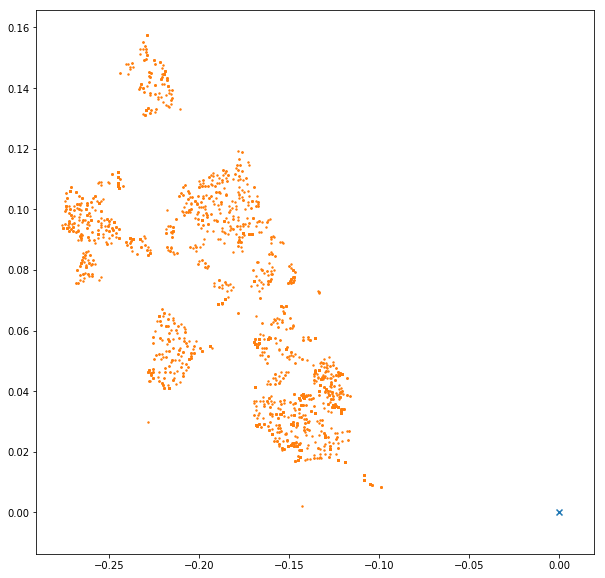

In [89]:
area = areas[3]
print('Area:',area)
X = df[df[areas[3]] == 1].drop('price',axis=1)
X.drop(areas,axis=1,inplace=True)
Y = np.log(df[df[areas[3]] == 1]['price'])
print('Количество записей: ', X.shape[0])
plt.figure(figsize=(10,10))
plt.scatter(0, 0, marker='x')
plt.scatter(X['lon'], X['lat'], s=2);

In [90]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
room_num,3779.0,2.517068,1.151063,1.000000,2.000000,2.000000,3.000000,6.000000
appartments,3779.0,0.021699,0.145718,0.000000,0.000000,0.000000,0.000000,1.000000
total_sq,3779.0,85.207624,64.585635,13.100000,49.750000,71.400000,100.000000,975.000000
red_line,3779.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
light_blue_line,3779.0,0.008203,0.090211,0.000000,0.000000,0.000000,0.000000,1.000000
purple_line,3779.0,0.344800,0.475366,0.000000,0.000000,0.000000,1.000000,1.000000
green_line,3779.0,0.014025,0.117609,0.000000,0.000000,0.000000,0.000000,1.000000
yellow_line,3779.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
light_green_line,3779.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
dark_blue_line,3779.0,0.147129,0.354281,0.000000,0.000000,0.000000,0.000000,1.000000


In [91]:
X = sm.add_constant(X)
lr = sm.OLS(Y, X).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     1215.
Date:                Tue, 24 Sep 2019   Prob (F-statistic):               0.00
Time:                        10:58:16   Log-Likelihood:                -326.06
No. Observations:                3779   AIC:                             690.1
Df Residuals:                    3760   BIC:                             808.6
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     8.97

In [92]:
lr = Lasso(alpha=0.001)
X.drop('const',axis=1,inplace=True)
lr.fit(X,Y)
print('R2 Lasso:', lr.score(X,Y))
print('const : ', lr.intercept_)
for coef, value in list(zip(X.columns,lr.coef_)):
    print(coef, ': ', value)
lasso_coefs.append({area: lr.coef_})

R2 Lasso: 0.8482185480702098
const :  8.561517243770702
room_num :  0.18688110369579225
appartments :  -0.0
total_sq :  0.0035708002928053
red_line :  0.0
light_blue_line :  0.030681616339734024
purple_line :  0.14477670912808122
green_line :  0.11158577410182491
yellow_line :  0.0
light_green_line :  0.0
dark_blue_line :  0.09278707263417418
orange_line :  0.0
grey_line :  0.0
mcc :  -0.08262787512587208
light_grey_line :  0.0
light_purple_line :  0.0
light_yellow_line :  0.0
sea_colour_line :  0.0
year :  0.003647747865729509
floor :  0.005653434566666618
max_floor :  0.0020260024970212356
living_space :  0.002198308609145523
kitchen_space :  0.01172043429633218
lat :  0.0
lon :  0.0
distance_from_kremlin :  0.0
subway_min :  -0.06345634316745277
min_dist_to_sub :  0.040740986092677824


### 1) в Лассо пропала дистанция от кремля, которая была незначимой в обычной
### 2) То же самое, что и в предыдущем, с долготой и широтой

## SVAO

Area: SVAO
Количество записей:  4003


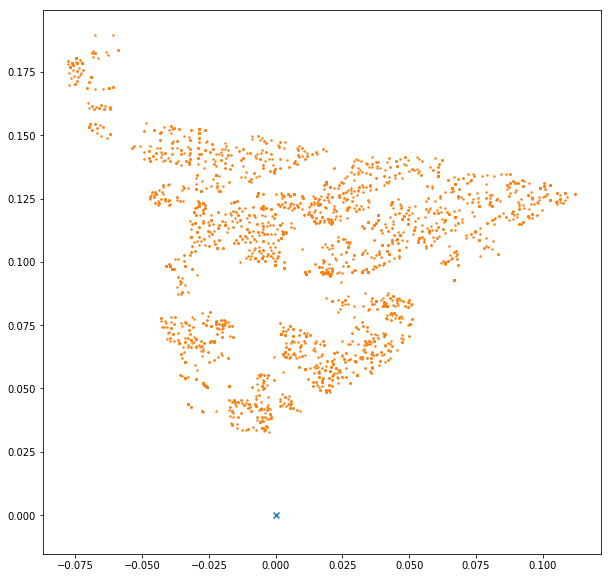

In [93]:
area = areas[4]
print('Area:',area)
X = df[df[areas[4]] == 1].drop('price',axis=1)
X.drop(areas,axis=1,inplace=True)
Y = np.log(df[df[areas[4]] == 1]['price'])
print('Количество записей: ', X.shape[0])
plt.figure(figsize=(10,10))
plt.scatter(0, 0, marker='x')
plt.scatter(X['lon'], X['lat'], s=2);

In [94]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
room_num,4003.0,2.205846,0.945594,1.000000,1.000000,2.000000,3.000000,6.000000
appartments,4003.0,0.038471,0.192355,0.000000,0.000000,0.000000,0.000000,1.000000
total_sq,4003.0,63.238781,29.193913,16.100000,42.165000,57.000000,75.350000,394.000000
red_line,4003.0,0.000250,0.015805,0.000000,0.000000,0.000000,0.000000,1.000000
light_blue_line,4003.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
purple_line,4003.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
green_line,4003.0,0.001499,0.038691,0.000000,0.000000,0.000000,0.000000,1.000000
yellow_line,4003.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
light_green_line,4003.0,0.129153,0.335411,0.000000,0.000000,0.000000,0.000000,1.000000
dark_blue_line,4003.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [95]:
X = sm.add_constant(X)
lr = sm.OLS(Y, X).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     1154.
Date:                Tue, 24 Sep 2019   Prob (F-statistic):               0.00
Time:                        11:04:00   Log-Likelihood:                 1038.4
No. Observations:                4003   AIC:                            -2037.
Df Residuals:                    3983   BIC:                            -1911.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    10.55

In [96]:
lr = Lasso(alpha=0.001)
X.drop('const',axis=1,inplace=True)
lr.fit(X,Y)
print('R2 Lasso:', lr.score(X,Y))
print('const : ', lr.intercept_)
for coef, value in list(zip(X.columns,lr.coef_)):
    print(coef, ': ', value)
lasso_coefs.append({area: lr.coef_})

R2 Lasso: 0.8443492041388575
const :  10.234664790717677
room_num :  0.08835315301124272
appartments :  -0.20606939818713152
total_sq :  0.013828759855315271
red_line :  -0.0
light_blue_line :  0.0
purple_line :  0.0
green_line :  0.0
yellow_line :  0.0
light_green_line :  -0.0
dark_blue_line :  0.0
orange_line :  0.07917644237060575
grey_line :  0.0024102556568238826
mcc :  -0.09143916740103923
light_grey_line :  0.0
light_purple_line :  0.0
light_yellow_line :  0.0
sea_colour_line :  0.0
year :  0.0027842326920183443
floor :  0.007891780713914732
max_floor :  -0.004351951190998444
living_space :  -0.0050184425117445605
kitchen_space :  -0.002286160177561419
lat :  0.0
lon :  -0.0
distance_from_kremlin :  -0.029380246891932596
subway_min :  -0.003482409528970248
min_dist_to_sub :  -0.016456478664905058


### c долготой/широтой то же самое. Но в этот раз в обычной регрессии у них вообще какие-то огромные значения

# VAO

Area: VAO
Количество записей:  3622


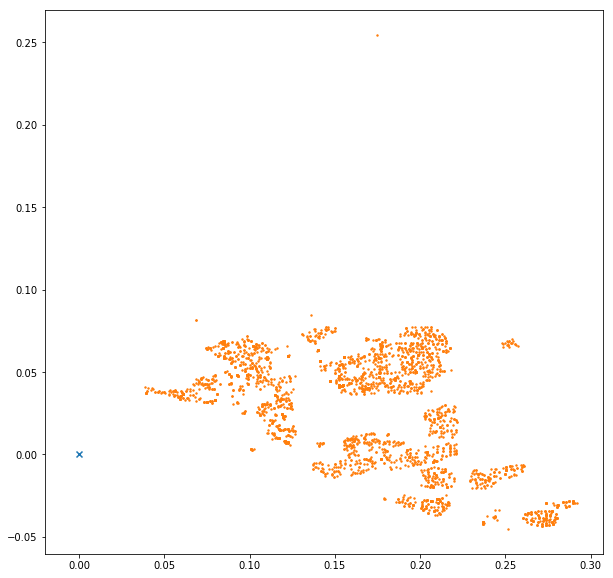

In [97]:
area = areas[5]
print('Area:',area)
X = df[df[areas[5]] == 1].drop('price',axis=1)
X.drop(areas,axis=1,inplace=True)
Y = np.log(df[df[areas[5]] == 1]['price'])
print('Количество записей: ', X.shape[0])
plt.figure(figsize=(10,10))
plt.scatter(0, 0, marker='x')
plt.scatter(X['lon'], X['lat'], s=2);

In [98]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
room_num,3622.0,2.183600,0.964562,1.000000,1.000000,2.000000,3.000000,6.000000
appartments,3622.0,0.012148,0.109562,0.000000,0.000000,0.000000,0.000000,1.000000
total_sq,3622.0,61.779616,36.287559,13.000000,40.000000,54.070000,73.000000,637.300000
red_line,3622.0,0.136389,0.343248,0.000000,0.000000,0.000000,0.000000,1.000000
light_blue_line,3622.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
purple_line,3622.0,0.044451,0.206122,0.000000,0.000000,0.000000,0.000000,1.000000
green_line,3622.0,0.000276,0.016616,0.000000,0.000000,0.000000,0.000000,1.000000
yellow_line,3622.0,0.124793,0.330530,0.000000,0.000000,0.000000,0.000000,1.000000
light_green_line,3622.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
dark_blue_line,3622.0,0.242408,0.428599,0.000000,0.000000,0.000000,0.000000,1.000000


In [99]:
X = sm.add_constant(X)
lr = sm.OLS(Y, X).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     1236.
Date:                Tue, 24 Sep 2019   Prob (F-statistic):               0.00
Time:                        11:08:27   Log-Likelihood:                 973.49
No. Observations:                3622   AIC:                            -1903.
Df Residuals:                    3600   BIC:                            -1767.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     7.33

In [100]:
lr = Lasso(alpha=0.001)
X.drop('const',axis=1,inplace=True)
lr.fit(X,Y)
print('R2 Lasso:', lr.score(X,Y))
print('const : ', lr.intercept_)
for coef, value in list(zip(X.columns,lr.coef_)):
    print(coef, ': ', value)
lasso_coefs.append({area: lr.coef_})

R2 Lasso: 0.8766668112739918
const :  7.636101128106333
room_num :  0.14092623295107068
appartments :  -0.19708625827228157
total_sq :  0.005804531552037496
red_line :  0.10032620510882757
light_blue_line :  0.0
purple_line :  -0.037758965400843204
green_line :  0.0
yellow_line :  -0.009850633052862027
light_green_line :  0.0
dark_blue_line :  0.11629897907734697
orange_line :  0.0
grey_line :  0.0
mcc :  -0.10547564844248399
light_grey_line :  0.0
light_purple_line :  0.022490096163493404
light_yellow_line :  0.0
sea_colour_line :  0.0
year :  0.004049676731815684
floor :  0.0031523525603611483
max_floor :  0.002758249215208565
living_space :  0.0011716658108253547
kitchen_space :  0.01312510678045883
lat :  0.0
lon :  -0.0
distance_from_kremlin :  -0.02968624921653878
subway_min :  -0.008021571645985081
min_dist_to_sub :  -0.02450268561871284


### 1) долгота и широта - то же самое

# UAO

Area: UAO
Количество записей:  4768


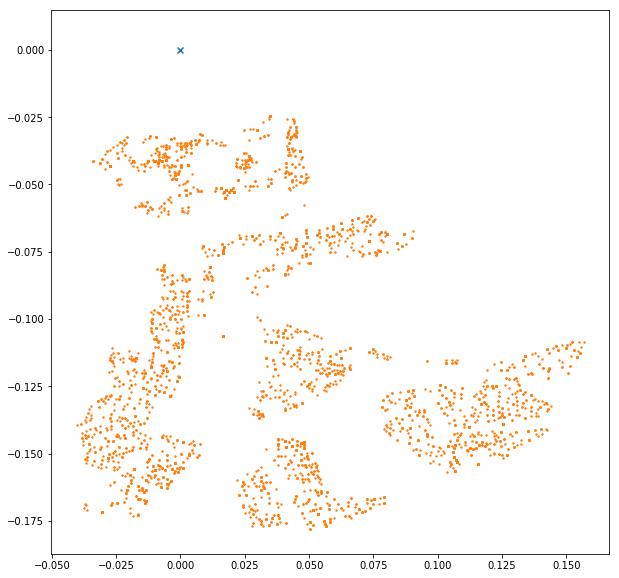

In [101]:
area = areas[6]
print('Area:',area)
X = df[df[areas[6]] == 1].drop('price',axis=1)
X.drop(areas,axis=1,inplace=True)
Y = np.log(df[df[areas[6]] == 1]['price'])
print('Количество записей: ', X.shape[0])
plt.figure(figsize=(10,10))
plt.scatter(0, 0, marker='x')
plt.scatter(X['lon'], X['lat'], s=2);

In [102]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
room_num,4768.0,2.193582,0.958804,1.000000,1.000000,2.000000,3.000000,6.000000
appartments,4768.0,0.013842,0.116848,0.000000,0.000000,0.000000,0.000000,1.000000
total_sq,4768.0,63.343031,29.755922,11.800000,42.000000,57.000000,75.000000,365.200000
red_line,4768.0,0.000419,0.020479,0.000000,0.000000,0.000000,0.000000,1.000000
light_blue_line,4768.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
purple_line,4768.0,0.009648,0.097758,0.000000,0.000000,0.000000,0.000000,1.000000
green_line,4768.0,0.261745,0.439631,0.000000,0.000000,0.000000,1.000000,1.000000
yellow_line,4768.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
light_green_line,4768.0,0.103817,0.305055,0.000000,0.000000,0.000000,0.000000,1.000000
dark_blue_line,4768.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [103]:
X = sm.add_constant(X)
lr = sm.OLS(Y, X).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     1904.
Date:                Tue, 24 Sep 2019   Prob (F-statistic):               0.00
Time:                        11:23:17   Log-Likelihood:                 1640.0
No. Observations:                4768   AIC:                            -3234.
Df Residuals:                    4745   BIC:                            -3085.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     7.74

In [104]:
lr = Lasso(alpha=0.001)
X.drop('const',axis=1,inplace=True)
lr.fit(X,Y)
print('R2 Lasso:', lr.score(X,Y))
print('const : ', lr.intercept_)
for coef, value in list(zip(X.columns,lr.coef_)):
    print(coef, ': ', value)
lasso_coefs.append({area: lr.coef_})

R2 Lasso: 0.8964570382564656
const :  8.02534316016476
room_num :  0.11223845506259938
appartments :  -0.0
total_sq :  0.008149337612928145
red_line :  0.0
light_blue_line :  0.0
purple_line :  -0.0
green_line :  -0.019140604036350112
yellow_line :  0.0
light_green_line :  0.0
dark_blue_line :  0.0
orange_line :  0.3070416850251313
grey_line :  0.010248019484559721
mcc :  -0.0569881824473548
light_grey_line :  0.0
light_purple_line :  0.0
light_yellow_line :  0.0
sea_colour_line :  -0.0
year :  0.0038934523069644746
floor :  0.0030486225823232135
max_floor :  0.0020215689822381086
living_space :  -0.0005629595448473537
kitchen_space :  0.00712964419603553
lat :  0.0
lon :  -0.0
distance_from_kremlin :  -0.029481819712780355
subway_min :  0.0004590899498727085
min_dist_to_sub :  -0.04236366192276265


### 1) опять же долгота и широта
### 2) последние 3 коэф имеют различные знаки в обеих регрессиях

## UZAO

Area: UZAO
Количество записей:  5025


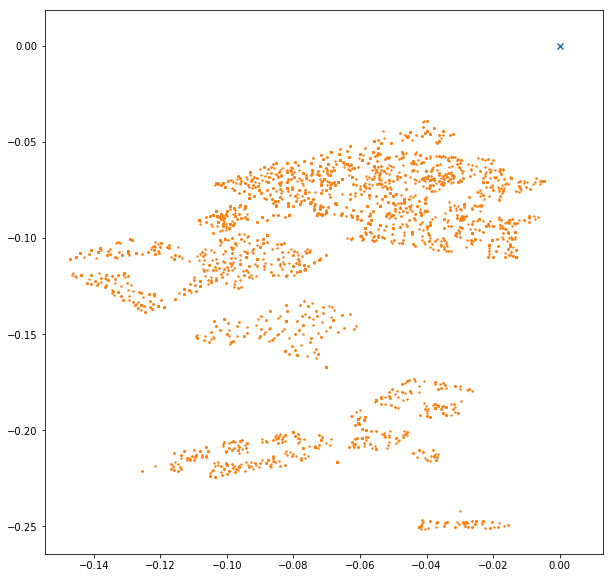

In [105]:
area = areas[7]
print('Area:',area)
X = df[df[areas[7]] == 1].drop('price',axis=1)
X.drop(areas,axis=1,inplace=True)
Y = np.log(df[df[areas[7]] == 1]['price'])
print('Количество записей: ', X.shape[0])
plt.figure(figsize=(10,10))
plt.scatter(0, 0, marker='x')
plt.scatter(X['lon'], X['lat'], s=2);

In [106]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
room_num,5025.0,2.452736,1.035499,1.000000,2.000000,2.000000,3.000000,6.000000
appartments,5025.0,0.012338,0.110402,0.000000,0.000000,0.000000,0.000000,1.000000
total_sq,5025.0,76.791150,44.880056,16.000000,47.500000,64.400000,90.200000,752.000000
red_line,5025.0,0.088756,0.284420,0.000000,0.000000,0.000000,0.000000,1.000000
light_blue_line,5025.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
purple_line,5025.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
green_line,5025.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
yellow_line,5025.0,0.000398,0.019948,0.000000,0.000000,0.000000,0.000000,1.000000
light_green_line,5025.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
dark_blue_line,5025.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [107]:
X = sm.add_constant(X)
lr = sm.OLS(Y, X).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     1810.
Date:                Tue, 24 Sep 2019   Prob (F-statistic):               0.00
Time:                        11:25:58   Log-Likelihood:                 683.22
No. Observations:                5025   AIC:                            -1322.
Df Residuals:                    5003   BIC:                            -1179.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     3.11

In [109]:
lr = Lasso(alpha=0.001)
X.drop('const',axis=1,inplace=True)
lr.fit(X,Y)
print('R2 Lasso:', lr.score(X,Y))
print('const : ', lr.intercept_)
for coef, value in list(zip(X.columns,lr.coef_)):
    print(coef, ': ', value)
lasso_coefs.append({area: lr.coef_})

R2 Lasso: 0.8824708377810271
const :  3.770062053289074
room_num :  0.15506752671907867
appartments :  -0.23725937419755935
total_sq :  0.006335712851546639
red_line :  0.14381266398398249
light_blue_line :  0.0
purple_line :  0.0
green_line :  0.0
yellow_line :  -0.0
light_green_line :  0.0
dark_blue_line :  0.0
orange_line :  0.04290365561116106
grey_line :  -0.03367823068579506
mcc :  -0.10197212975502863
light_grey_line :  0.0
light_purple_line :  0.0
light_yellow_line :  -0.0
sea_colour_line :  -0.06263056067466463
year :  0.006173757692176422
floor :  0.0016794086259005541
max_floor :  0.0027502451394095144
living_space :  -0.0007155554181416352
kitchen_space :  0.008098168780442222
lat :  0.0
lon :  -0.0
distance_from_kremlin :  -0.07236789619847486
subway_min :  0.044643792647748745
min_dist_to_sub :  0.011624684752680874


### 1)Обе регрессии говорят, что расстояние до метро и количество станций - положительно влияют на цену, что странно.
### 2)Долгота и широта

# ZAO

Area: ZAO
Количество записей:  7337


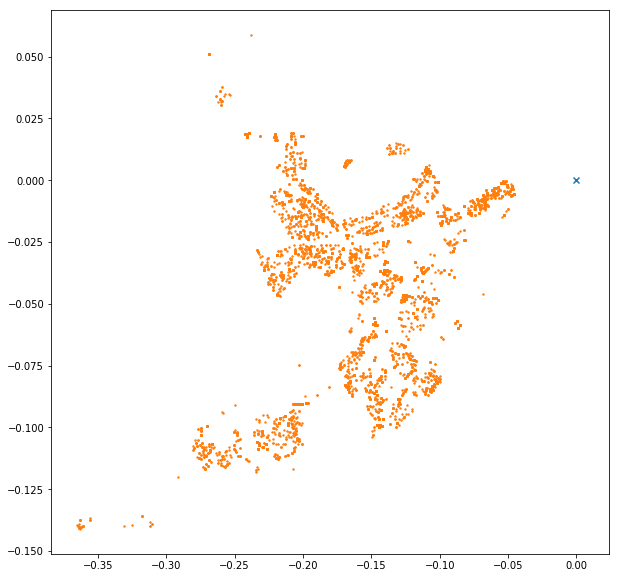

In [110]:
area = areas[8]
print('Area:',area)
X = df[df[areas[8]] == 1].drop('price',axis=1)
X.drop(areas,axis=1,inplace=True)
Y = np.log(df[df[areas[8]] == 1]['price'])
print('Количество записей: ', X.shape[0])
plt.figure(figsize=(10,10))
plt.scatter(0, 0, marker='x')
plt.scatter(X['lon'], X['lat'], s=2);

In [111]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
room_num,7337.0,2.658035,1.137195,1.000000,2.000000,3.000000,3.000000,6.000000
appartments,7337.0,0.018809,0.135858,0.000000,0.000000,0.000000,0.000000,1.000000
total_sq,7337.0,94.843142,75.533080,18.100000,54.000000,75.000000,111.100000,1380.000000
red_line,7337.0,0.166417,0.372480,0.000000,0.000000,0.000000,0.000000,1.000000
light_blue_line,7337.0,0.237427,0.425535,0.000000,0.000000,0.000000,0.000000,1.000000
purple_line,7337.0,0.000136,0.011675,0.000000,0.000000,0.000000,0.000000,1.000000
green_line,7337.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
yellow_line,7337.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
light_green_line,7337.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
dark_blue_line,7337.0,0.238381,0.426122,0.000000,0.000000,0.000000,0.000000,1.000000


In [112]:
X = sm.add_constant(X)
lr = sm.OLS(Y, X).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     1555.
Date:                Tue, 24 Sep 2019   Prob (F-statistic):               0.00
Time:                        11:32:04   Log-Likelihood:                -2624.2
No. Observations:                7337   AIC:                             5290.
Df Residuals:                    7316   BIC:                             5435.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     3.07

In [113]:
lr = Lasso(alpha=0.001)
X.drop('const',axis=1,inplace=True)
lr.fit(X,Y)
print('R2 Lasso:', lr.score(X,Y))
print('const : ', lr.intercept_)
for coef, value in list(zip(X.columns,lr.coef_)):
    print(coef, ': ', value)
lasso_coefs.append({area: lr.coef_})

R2 Lasso: 0.805083978345005
const :  4.643703366082624
room_num :  0.25612275932850226
appartments :  -0.32468274019955684
total_sq :  0.002012755825455294
red_line :  0.13350000754865704
light_blue_line :  -0.12184986065860245
purple_line :  -0.0
green_line :  0.0
yellow_line :  0.0
light_green_line :  0.0
dark_blue_line :  0.0956504386266538
orange_line :  -0.0
grey_line :  0.0
mcc :  0.009774867048657678
light_grey_line :  0.0
light_purple_line :  0.0
light_yellow_line :  -0.0763381750255479
sea_colour_line :  0.0
year :  0.0058355360098308676
floor :  0.0024392512820454186
max_floor :  0.005198212429537035
living_space :  0.002111576327074588
kitchen_space :  0.013955334582017255
lat :  -0.0
lon :  0.0
distance_from_kremlin :  -0.07521732533864296
subway_min :  0.019414787761924117
min_dist_to_sub :  -0.01572038041085534


### Опять три последних коэф имеют разные знакие (не все)
### Опять широта и долгота

### ZelAO

Area: ZalAO
Количество записей:  605


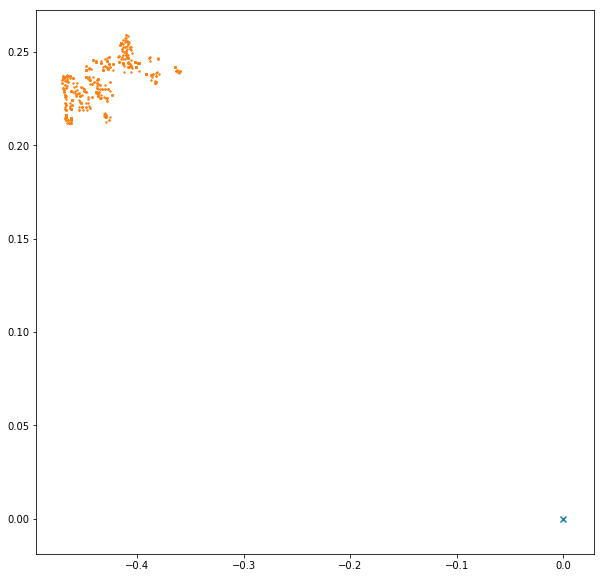

In [118]:
area = areas[9]
print('Area:',area)
X = df[df[areas[9]] == 1].drop('price',axis=1)
X.drop(areas,axis=1,inplace=True)
Y = np.log(df[df[areas[9]] == 1]['price'])
print('Количество записей: ', X.shape[0])
plt.figure(figsize=(10,10))
plt.scatter(0, 0, marker='x')
plt.scatter(X['lon'], X['lat'], s=2);

In [119]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
room_num,605.0,2.216529,1.020189,1.000000,1.000000,2.000000,3.000000,6.000000
appartments,605.0,0.004959,0.070301,0.000000,0.000000,0.000000,0.000000,1.000000
total_sq,605.0,60.056694,23.986787,20.000000,41.300000,55.000000,75.000000,225.000000
red_line,605.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
light_blue_line,605.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
purple_line,605.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
green_line,605.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
yellow_line,605.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
light_green_line,605.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
dark_blue_line,605.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


### В модель обычной регрессии почему-то не добавляется константа. Я не понимаю, почему

In [122]:
X = sm.add_constant(X)
lr = sm.OLS(Y, X).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     395.1
Date:                Tue, 24 Sep 2019   Prob (F-statistic):          3.00e-273
Time:                        11:37:02   Log-Likelihood:                 429.98
No. Observations:                 605   AIC:                            -834.0
Df Residuals:                     592   BIC:                            -776.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
room_num                  0.07

/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:1100: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [124]:
lr = Lasso(alpha=0.001)
#X.drop('const',axis=1,inplace=True)
lr.fit(X,Y)
print('R2 Lasso:', lr.score(X,Y))
print('const : ', lr.intercept_)
for coef, value in list(zip(X.columns,lr.coef_)):
    print(coef, ': ', value)
lasso_coefs.append({area: lr.coef_})

R2 Lasso: 0.8827718231195955
const :  14.193108844919488
room_num :  0.0655859623395522
appartments :  -0.3447572504025059
total_sq :  0.011359234399795528
red_line :  0.0
light_blue_line :  0.0
purple_line :  0.0
green_line :  0.0
yellow_line :  0.0
light_green_line :  0.0
dark_blue_line :  0.0
orange_line :  0.0
grey_line :  0.0
mcc :  0.0
light_grey_line :  0.0
light_purple_line :  0.0
light_yellow_line :  0.0
sea_colour_line :  0.0
year :  0.0013637947495299218
floor :  0.0032499942680089986
max_floor :  -0.0007067037510240202
living_space :  -0.00209997432568906
kitchen_space :  0.015374382573766913
lat :  0.0
lon :  0.0
distance_from_kremlin :  -0.07908797110033183
subway_min :  0.0
min_dist_to_sub :  0.053781106915691795


### Широта и долгота тоже самое
### Жилые площади уменьшают цену !?

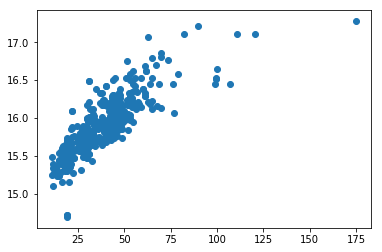

In [125]:
plt.scatter(X['living_space'], Y)

А на графике все вроде бы ок

# CAO

Area: CAO
Количество записей:  6703


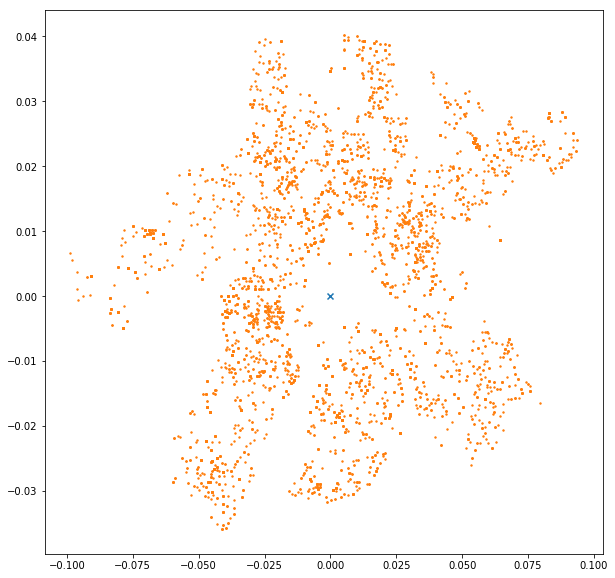

In [126]:
area = areas[10]
print('Area:',area)
X = df[df[areas[10]] == 1].drop('price',axis=1)
X.drop(areas,axis=1,inplace=True)
Y = np.log(df[df[areas[10]] == 1]['price'])
print('Количество записей: ', X.shape[0])
plt.figure(figsize=(10,10))
plt.scatter(0, 0, marker='x')
plt.scatter(X['lon'], X['lat'], s=2);

In [128]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
const,6703.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
room_num,6703.0,3.029390,1.293143,1.000000,2.000000,3.000000,4.000000,6.000000
appartments,6703.0,0.097121,0.296144,0.000000,0.000000,0.000000,0.000000,1.000000
total_sq,6703.0,114.744988,78.085495,16.000000,63.000000,94.000000,145.000000,1050.000000
red_line,6703.0,0.298374,0.457579,0.000000,0.000000,0.000000,1.000000,1.000000
light_blue_line,6703.0,0.156199,0.363071,0.000000,0.000000,0.000000,0.000000,1.000000
purple_line,6703.0,0.223780,0.416808,0.000000,0.000000,0.000000,0.000000,1.000000
green_line,6703.0,0.192302,0.394138,0.000000,0.000000,0.000000,0.000000,1.000000
yellow_line,6703.0,0.085633,0.279843,0.000000,0.000000,0.000000,0.000000,1.000000
light_green_line,6703.0,0.151574,0.358634,0.000000,0.000000,0.000000,0.000000,1.000000


In [127]:
X = sm.add_constant(X)
lr = sm.OLS(Y, X).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     1065.
Date:                Tue, 24 Sep 2019   Prob (F-statistic):               0.00
Time:                        11:42:46   Log-Likelihood:                -3664.7
No. Observations:                6703   AIC:                             7379.
Df Residuals:                    6678   BIC:                             7550.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     4.16

In [129]:
lr = Lasso(alpha=0.001)
X.drop('const',axis=1,inplace=True)
lr.fit(X,Y)
print('R2 Lasso:', lr.score(X,Y))
print('const : ', lr.intercept_)
for coef, value in list(zip(X.columns,lr.coef_)):
    print(coef, ': ', value)
lasso_coefs.append({area: lr.coef_})

R2 Lasso: 0.7904769197693629
const :  3.929600374025833
room_num :  0.18458549382683567
appartments :  -0.0854896486418128
total_sq :  0.0038780072487559184
red_line :  0.07073470197023704
light_blue_line :  0.01993542255288785
purple_line :  -0.0667037963675619
green_line :  -0.0640302504618389
yellow_line :  -0.08005885235794563
light_green_line :  -0.037902282891254115
dark_blue_line :  0.0036971673258241397
orange_line :  -0.028155580199007723
grey_line :  0.0
mcc :  0.05363946359981162
light_grey_line :  -0.0
light_purple_line :  0.0
light_yellow_line :  0.0
sea_colour_line :  0.0
year :  0.006625625807414493
floor :  0.005760614849144311
max_floor :  -0.003583713270477607
living_space :  0.0009352838016230033
kitchen_space :  0.012183018798690253
lat :  -0.0
lon :  -2.4152082837081115
distance_from_kremlin :  -0.27281237781728246
subway_min :  0.044265552369933965
min_dist_to_sub :  -0.028395655005126787


### Долгота и широта появилась и в Лассо регресии. Причем она сильно влияет на цену
### С вектами метро вообще черт пойми что
### С минимальным расстоянием до центра не понятно что. Но тут может быть проблема в том, как я определял минимальное расстояние

## TAO

Area: TAO
Количество записей:  512


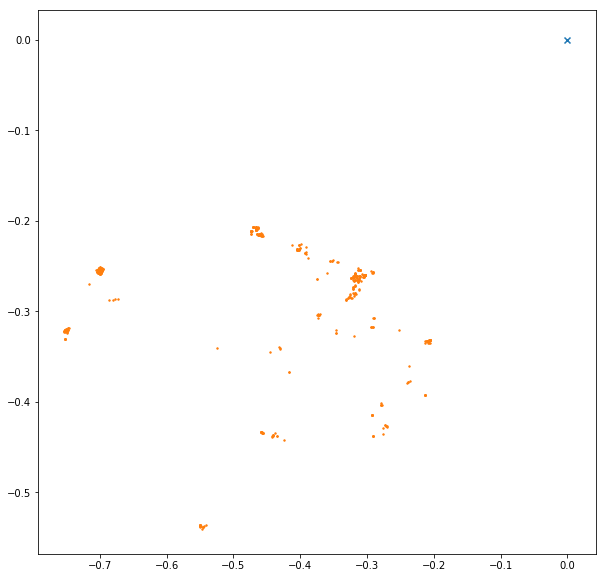

In [131]:
area = areas[11]
print('Area:',area)
X = df[df[areas[11]] == 1].drop('price',axis=1)
X.drop(areas,axis=1,inplace=True)
Y = np.log(df[df[areas[11]] == 1]['price'])
print('Количество записей: ', X.shape[0])
plt.figure(figsize=(10,10))
plt.scatter(0, 0, marker='x')
plt.scatter(X['lon'], X['lat'], s=2);

In [132]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
room_num,512.0,1.941406,0.864886,1.000000,1.000000,2.000000,3.000000,6.000000
appartments,512.0,0.039062,0.193933,0.000000,0.000000,0.000000,0.000000,1.000000
total_sq,512.0,58.974609,26.307869,19.200000,41.000000,52.650000,71.075000,271.000000
red_line,512.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
light_blue_line,512.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
purple_line,512.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
green_line,512.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
yellow_line,512.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
light_green_line,512.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
dark_blue_line,512.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [135]:
X = sm.add_constant(X)
lr = sm.OLS(Y, X).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     126.0
Date:                Tue, 24 Sep 2019   Prob (F-statistic):          4.73e-148
Time:                        11:48:44   Log-Likelihood:                 121.70
No. Observations:                 512   AIC:                            -215.4
Df Residuals:                     498   BIC:                            -156.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    14.38

/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:1100: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [136]:
lr = Lasso(alpha=0.001)
X.drop('const',axis=1,inplace=True)
lr.fit(X,Y)
print('R2 Lasso:', lr.score(X,Y))
print('const : ', lr.intercept_)
for coef, value in list(zip(X.columns,lr.coef_)):
    print(coef, ': ', value)
lasso_coefs.append({area: lr.coef_})

R2 Lasso: 0.7611613492023092
const :  18.163613170580437
room_num :  0.0883321440269123
appartments :  -0.370476919140037
total_sq :  0.004664696873086342
red_line :  0.0
light_blue_line :  0.0
purple_line :  0.0
green_line :  0.0
yellow_line :  0.0
light_green_line :  0.0
dark_blue_line :  0.0
orange_line :  0.0
grey_line :  0.0
mcc :  0.0
light_grey_line :  0.0
light_purple_line :  0.0
light_yellow_line :  0.0
sea_colour_line :  0.0
year :  -0.0009795552297092106
floor :  -0.0010767187026848421
max_floor :  0.016905100961563425
living_space :  0.003222954448642822
kitchen_space :  0.011944583251361716
lat :  -0.0
lon :  0.0
distance_from_kremlin :  -0.05827062806756808
subway_min :  0.006642432253392017
min_dist_to_sub :  0.044040253907407435


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


### Знаки в регрессиях разнятся при 3 проследних разнятся
### Долгота и широта

## Таблица с коэф регрессий по каждому из районов

In [183]:
summary_table = pd.DataFrame(index=X.columns)
for i, dct in enumerate(lasso_coefs):
    summary_table['area' +str(i)] = pd.DataFrame(dct, index=X.columns)
summary_table

,area0,area1,area2,area3,area4,area5,area6,area7,area8,area9,area10,area11
room_num,0.069005,0.124698,0.038969,0.186881,0.088353,0.140926,0.112238,0.155068,0.256123,0.065586,0.184585,0.088332
appartments,-0.084625,-0.035619,-0.128103,-0.000000,-0.206069,-0.197086,-0.000000,-0.237259,-0.324683,-0.344757,-0.085490,-0.370477
total_sq,0.007833,0.007277,0.009824,0.003571,0.013829,0.005805,0.008149,0.006336,0.002013,0.011359,0.003878,0.004665
red_line,0.000000,0.000000,0.000000,0.000000,-0.000000,0.100326,0.000000,0.143813,0.133500,0.000000,0.070735,0.000000
light_blue_line,0.000000,0.000000,0.000000,0.030682,0.000000,0.000000,0.000000,0.000000,-0.121850,0.000000,0.019935,0.000000
purple_line,0.000000,-0.009441,-0.000000,0.144777,0.000000,-0.037759,-0.000000,0.000000,-0.000000,0.000000,-0.066704,0.000000
green_line,0.000000,0.086514,0.034921,0.111586,0.000000,0.000000,-0.019141,0.000000,0.000000,0.000000,-0.064030,0.000000
yellow_line,0.000000,0.000000,0.009717,0.000000,0.000000,-0.009851,0.000000,-0.000000,0.000000,0.000000,-0.080059,0.000000
light_green_line,0.000000,-0.040456,0.021374,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.037902,0.000000
dark_blue_line,0.000000,0.000000,0.000000,0.092787,0.000000,0.116299,0.000000,0.000000,0.095650,0.000000,0.003697,0.000000


## Интересно получается, что некоторые коэф. имеют разное влияние на цену в зависимости от района. Наример, год имеет отрицательное влияение в первом и последнем районе, а в остальных положительное (что странно). Минимальное расстояние до метро где-т положительное влияение, где-то отрицательное и тд и тп. А наоборот, красная ветка для всех районов положительная, дистанция от кремя для всех отрицательная 

# Вопросы/идеи
### 1) Странно, что есть районы, в которых чем больше максимальный этаж, тем болше цена
### 2) Этажи дома должно быть коррелированы с годом постройки. Почему бы не разбить на высокоэтажки и низкоэтажки
### 3) Предлагаю разбить на группы по тем районам, у которых параметры одинково себя ведут и исследовать их. Например, смотреть на группы, у максимальный этаж положительно влияет на цену и отрциательно
### 4) Можно выбрать наиболее значимые признаки для района (те, которые сильнее всего влияте на цену) и сравнить их
### 5) Данные не нормированы, поэтому их немного сложно сравнивать. Нужно ли нормировать?
### 6) Что делать с коррелированными признаками?
### 7) Долгота и широта должны коррелировать с расстоянием от Кремля. Изначально я их вводил для того, чтобы они задавали направление от Кремля. Теперь за направление отвечает дами на район. Какой смысл тогда в долготе и широте?
### 8) Как будем осуществлять отбор признаков? Будем ли мы делать тесты на саму модель и включение/исключение признаков? 
### 7) Будем ли убирать выбросы по признакам? Например, у нас есть здание с